In [10]:
import pandas as pd
import requests
import pprint
import plotly.express as px

In [11]:
devcadsrurl = "https://cadsrapi-dev.cancer.gov/rad/NCIAPI/1.0/api/DataElement/getCRDCList"
prodcadsrurl = "https://cadsrapi.cancer.gov/rad/NCIAPI/1.0/api/DataElement/getCRDCList"

In [12]:
jsonresults = requests.get(prodcadsrurl, headers = {"accept":"application/json"})
jsonlist = jsonresults.json()['CRDCDataElements']    

In [13]:
cdecount = 0
enumcount = 0
for cde in jsonlist:
    cdecount = cdecount +1
    if cde['VD Type'] == 'Enumerated':
        enumcount = enumcount+1

In [14]:
pprint.pprint(cdecount)
pprint.pprint(enumcount)

43
19


In [15]:
unenumcount = cdecount - enumcount

In [16]:
countdata = [['CDE Count', cdecount], ['CDE With Enums',enumcount], ['CDEs w/o Enums', unenumcount]]
df = pd.DataFrame(countdata, columns=['Category','Counts'])

In [17]:
print(df)

         Category  Counts
0       CDE Count      43
1  CDE With Enums      19
2  CDEs w/o Enums      24


In [18]:
repocounts = {}
for cde in jsonlist:
    repokey = cde['Owned By']
    if repokey in repocounts:
        repocounts[repokey] = repocounts[repokey] + 1
    else:
        repocounts[repokey] = 1

In [19]:
pprint.pprint(repocounts)

{'CCR': 1, 'CRDC': 35, 'CTEP': 1, 'GDC': 2, 'NCI Standards': 2, 'NCIP': 2}


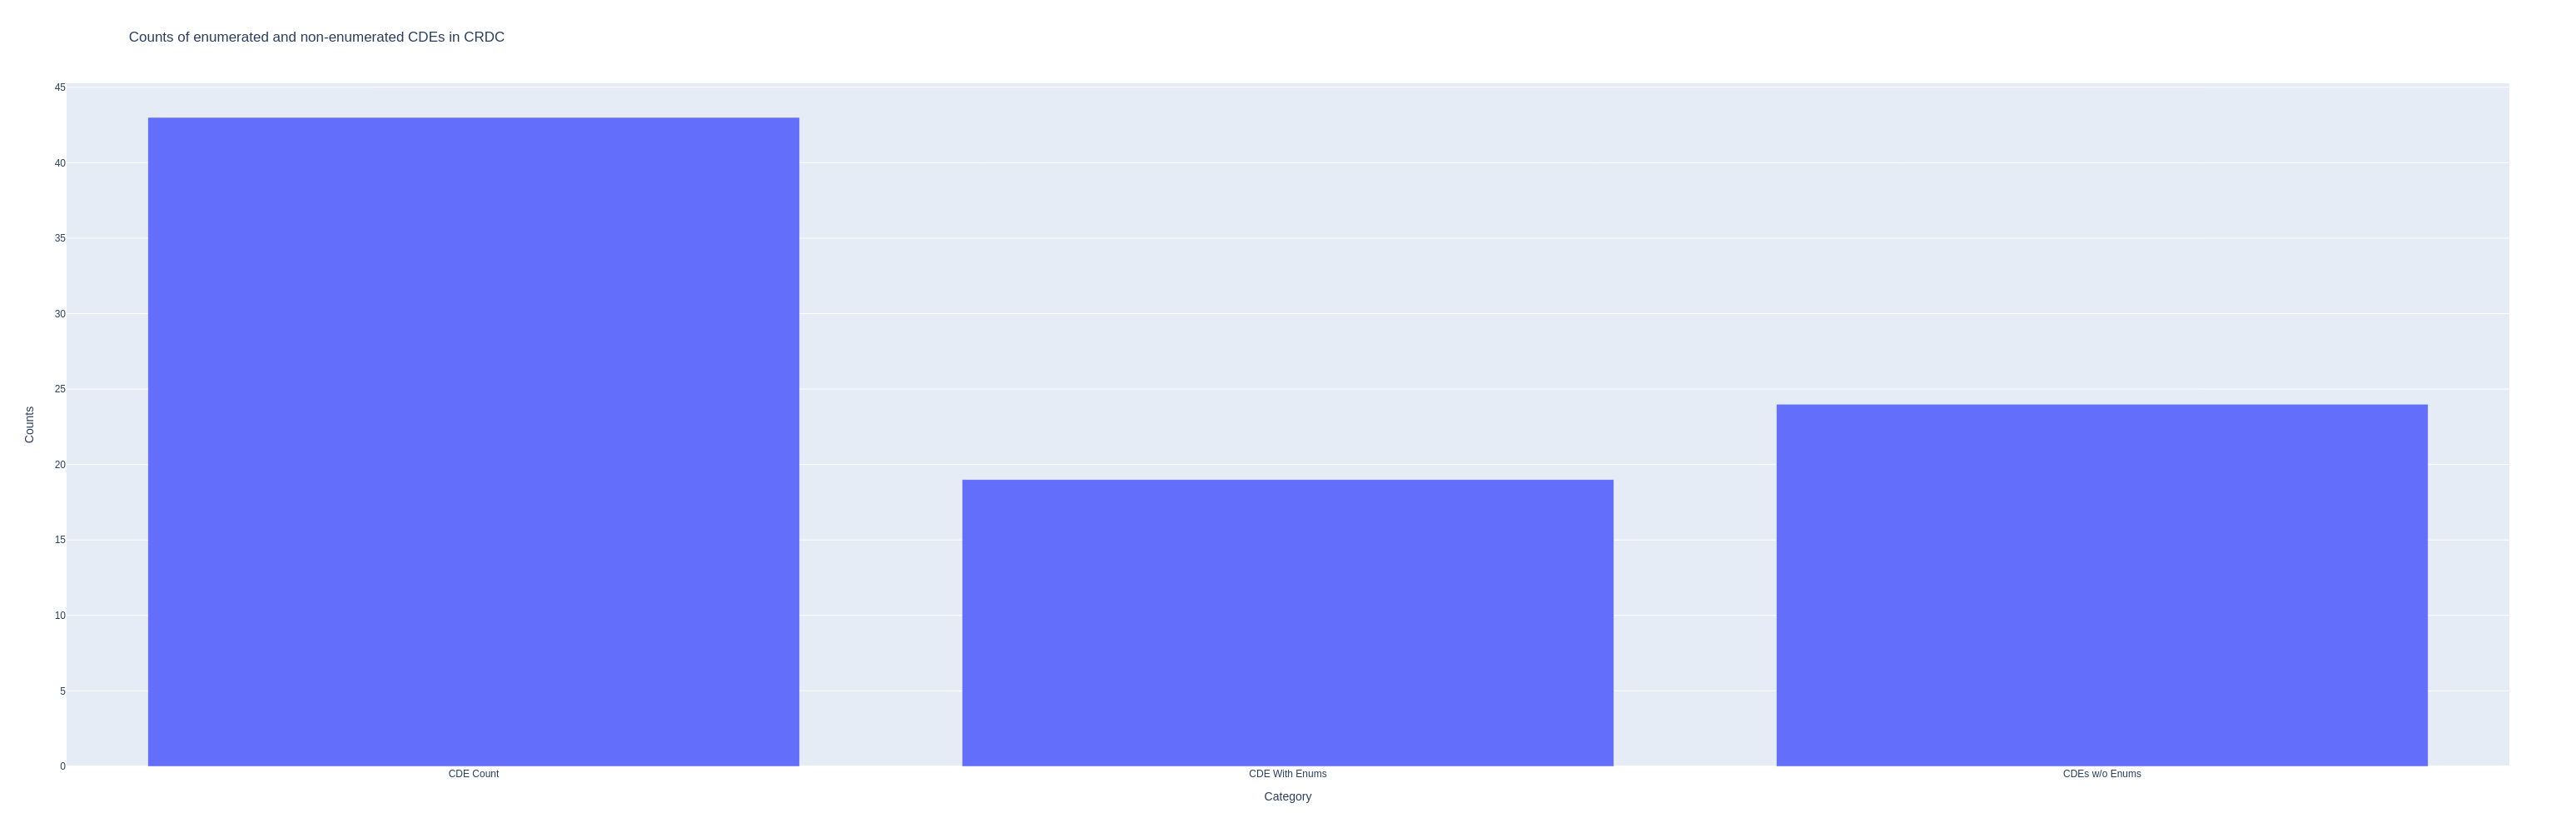

In [35]:
fig = px.bar(df, x = 'Category', y = 'Counts', title = 'Counts of enumerated and non-enumerated CDEs in CRDC', width = 1000, height = 1000)
fig.show()

In [22]:
repodfdata = {}
for repo,value in repocounts.items():
    counts = []
    counts.append(value)
    repodfdata[repo] = counts
pprint.pprint(repodfdata)

{'CCR': [1],
 'CRDC': [35],
 'CTEP': [1],
 'GDC': [2],
 'NCI Standards': [2],
 'NCIP': [2]}


In [27]:
repolist = []
countlist = []
for repo,value in repocounts.items():
    repolist.append(repo)
    countlist.append(value)
repodfdata = {'Repository':repolist, 'CDE Count': countlist}

In [28]:
repodf = pd.DataFrame.from_dict(repodfdata)
repodf.head()

,Repository,CDE Count
0,CRDC,35
1,NCIP,2
2,GDC,2
3,NCI Standards,2
4,CCR,1


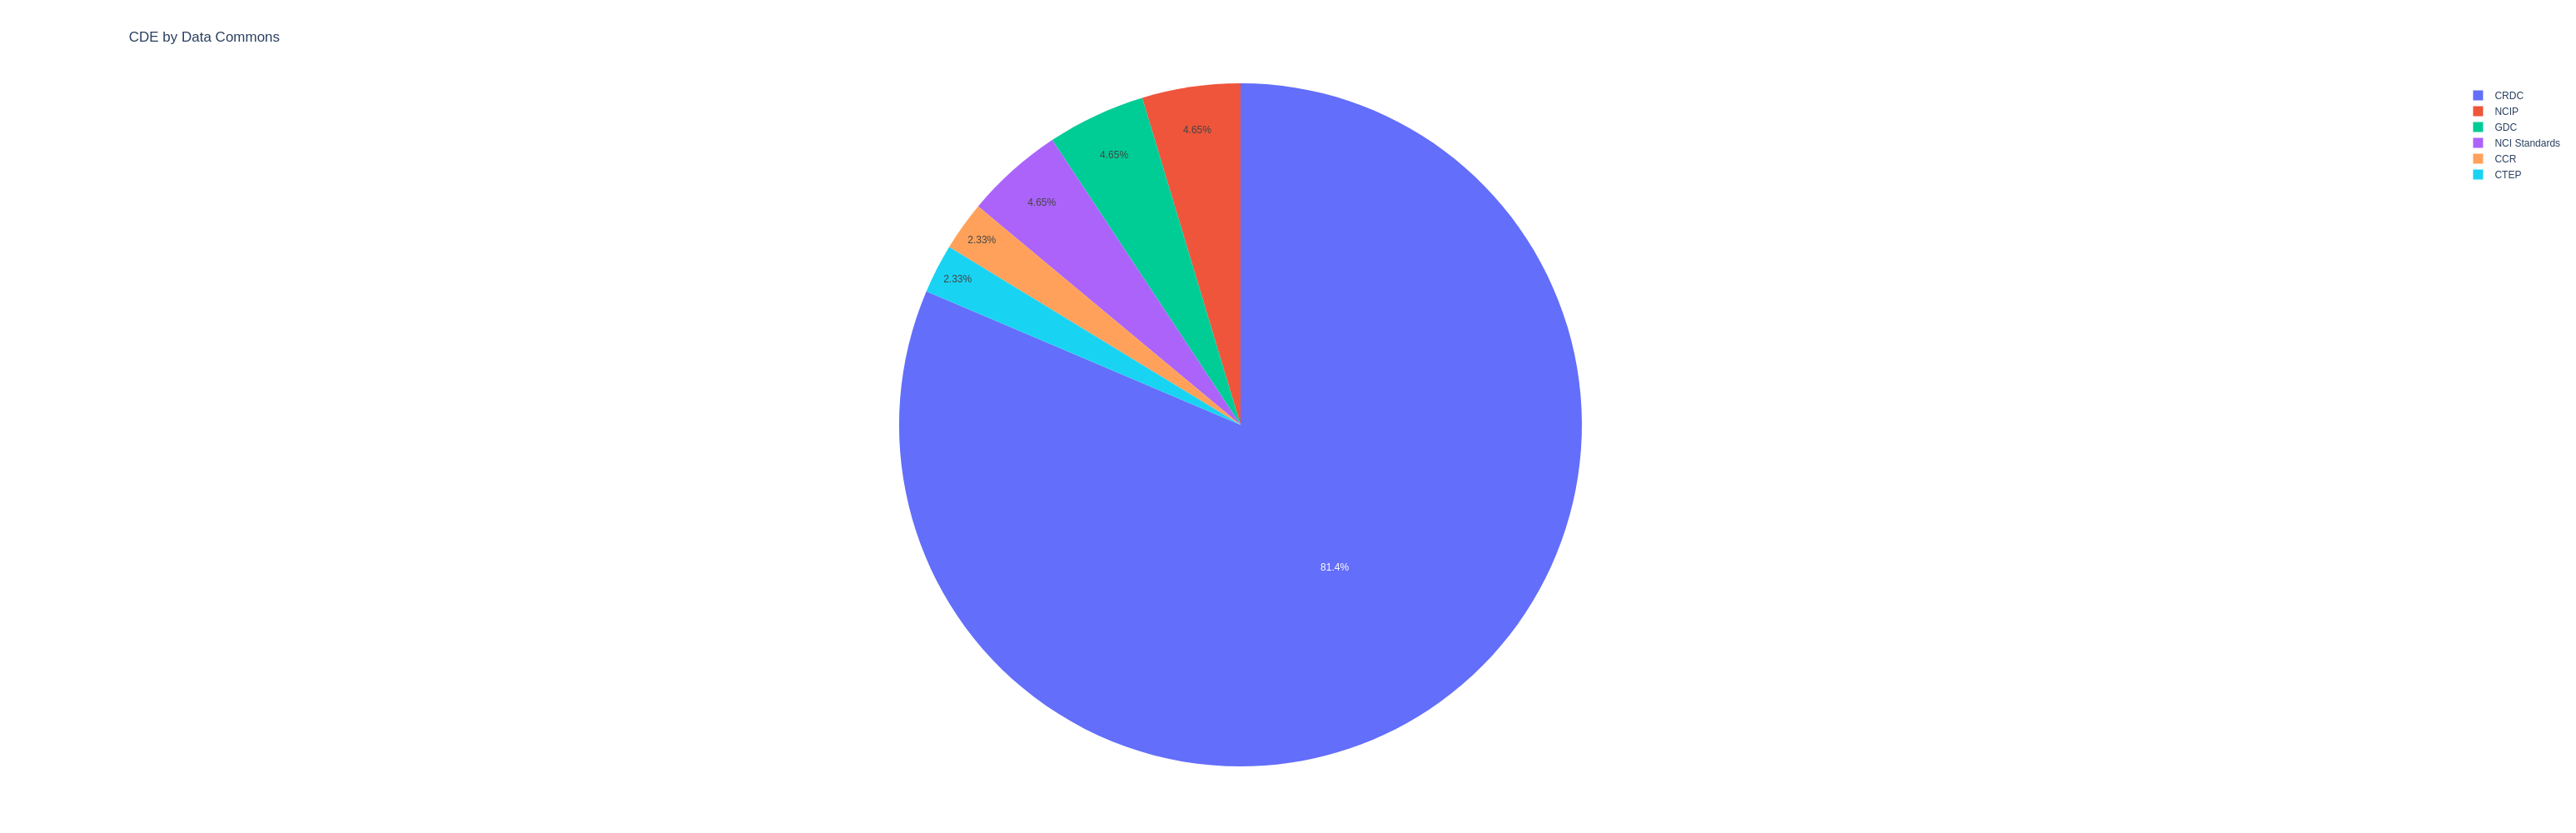

In [36]:
fig2 = px.pie(repodf, names = 'Repository', values = 'CDE Count', title = 'CDE by Data Commons', width = 1000, height = 1000)
fig2.show()